In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
# Load data

Result_dir = "/Users/zla0368/Documents/RL/RL_Class/code/test_hw/week-3-intro-to-marl-heng4str/submission/evaluation_reports/MARL_Competition_Final/"
csv_files = glob.glob(Result_dir + '*.csv')

In [3]:
# Load DTDE-1v1-Death_Match-Eval data


Death_Match_dfs = []
Door_Key_Match_dfs = []

for file_name in csv_files:
    # print(f"Checking file: {file_name}")  # Add a print statement here

    if "heng" in file_name.split("/")[-1]:
        # print(f"Skipping file: {file_name}")  # Add a print statement here
        continue

    if "Death_Match" in file_name and "summary" in file_name:
        # print(f"Processing as Death_Match file: {file_name}")  # Add a print statement here
        df = pd.read_csv(file_name)
        red_policy_id = file_name.split("/")[-1].split("_as_Red_VS_")[0].split("_")[-1]
        if red_policy_id == "policy":
            red_policy_id = file_name.split("/")[-1].split("_as_Red_VS_")[0].split("_")[-2]
        blue_policy_id = file_name.split("/")[-1].split("_as_Red_VS_")[1].split("_")[0]
        df["red_policy_id"] = red_policy_id
        df["blue_policy_id"] = blue_policy_id
        Death_Match_dfs.append(df)
    elif "summary" in file_name and "Death_Match" not in file_name:
        # print(f"Processing as Door_Key_Match file: {file_name}")  # Add a print statement here
        df = pd.read_csv(file_name)
        red_policy_id = file_name.split("/")[-1].split("_as_Red_VS_")[0].split("_")[-1]
        if red_policy_id == "policy":
            red_policy_id = file_name.split("/")[-1].split("_as_Red_VS_")[0].split("_")[-2]
        blue_policy_id = file_name.split("/")[-1].split("_as_Red_VS_")[1].split("_")[0]
        df["red_policy_id"] = red_policy_id
        df["blue_policy_id"] = blue_policy_id
        Door_Key_Match_dfs.append(df)


    
        





In [4]:
len(csv_files)

72

In [5]:
len(Door_Key_Match_dfs)

10

In [35]:
len(Door_Key_Match_dfs)

Door_Key_Match_df = pd.concat(Door_Key_Match_dfs, ignore_index=True)

In [36]:
Door_Key_Match_df

,red_0,blue_0,door_open_done,eliminated_opponents_done,got_eliminated_done,eliminated_opponent_num,Episode Length,Solved Ratio,red_policy_id,blue_policy_id,Solved
0,1.530495,-0.3159,0.500000,0.400000,0.1,0.400000,26.1,1.0,pickupper,blather,NaN
1,0.819400,-0.4504,0.000000,0.500000,0.0,0.500000,159.9,0.5,blather,JaiAslamAgent,NaN
2,1.253600,-0.4661,0.400000,0.400000,0.0,0.400000,75.2,0.8,jpblackburn,blather,NaN
3,0.487900,-0.7483,0.000000,0.600000,0.0,0.600000,157.3,0.6,JaiAslamAgent,blather,NaN
4,1.831685,-0.9042,0.000000,1.000000,0.0,1.000000,22.4,1.0,pickupper,jpblackburn,NaN
5,1.414400,-1.0018,0.000000,1.000000,0.0,1.000000,11.8,1.0,blather,pickupper,NaN
6,1.451200,-0.8029,0.200000,0.800000,0.0,0.800000,16.1,1.0,jpblackburn,pickupper,NaN
7,1.368200,-1.0029,0.000000,1.000000,0.0,1.000000,27.2,1.0,blather,jpblackburn,NaN
8,0.383700,-0.5825,0.000000,0.400000,0.0,0.400000,188.2,0.4,JaiAslamAgent,pickupper,NaN
9,1.249335,0.0822,0.555556,0.222222,0.3,0.222222,21.9,1.0,pickupper,JaiAslamAgent,1.0


In [37]:
import pandas as pd

# Your DataFrame is stored in df

# Group by 'red_policy_id' and compute the mean for 'red_0' and 'Solved Ratio'
# Group by 'red_policy_id' and compute the mean for 'red_0' and 'Solved Ratio'
grouped = Door_Key_Match_df.groupby('red_policy_id')[['red_0', 'Solved Ratio']].mean()


# Now sort the grouped DataFrame based on 'red_0' and 'Solved Ratio'
# Sort by multiple columns by passing a list of column names
red_ranked = grouped.sort_values(by=['red_0', 'Solved Ratio'], ascending=[False, False]).reset_index()

# The 'ranked' DataFrame now contains the ranking of red policies
# based on the average 'red_0' and 'Solved Ratio'
print(red_ranked)


   red_policy_id     red_0  Solved Ratio
0      pickupper  1.537172      1.000000
1    jpblackburn  1.352400      0.900000
2        blather  1.200667      0.833333
3  JaiAslamAgent  0.435800      0.500000


In [38]:
red_ranked = red_ranked.rename(columns={'red_0' : "Average Reward as Red", 'Solved Ratio': "Win Rate"})

In [39]:
# Assuming your DataFrame is stored in a variable called 'df'
styled_df = red_ranked.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background', '#606060'), 
                  ('color', 'white'),
                  ('font-family', 'verdana')]
    }]
)

# To display in Jupyter Notebook, just put this in a cell:
styled_df


,red_policy_id,Average Reward as Red,Win Rate
0,pickupper,1.537172,1.000000
1,jpblackburn,1.352400,0.900000
2,blather,1.200667,0.833333
3,JaiAslamAgent,0.435800,0.500000


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns



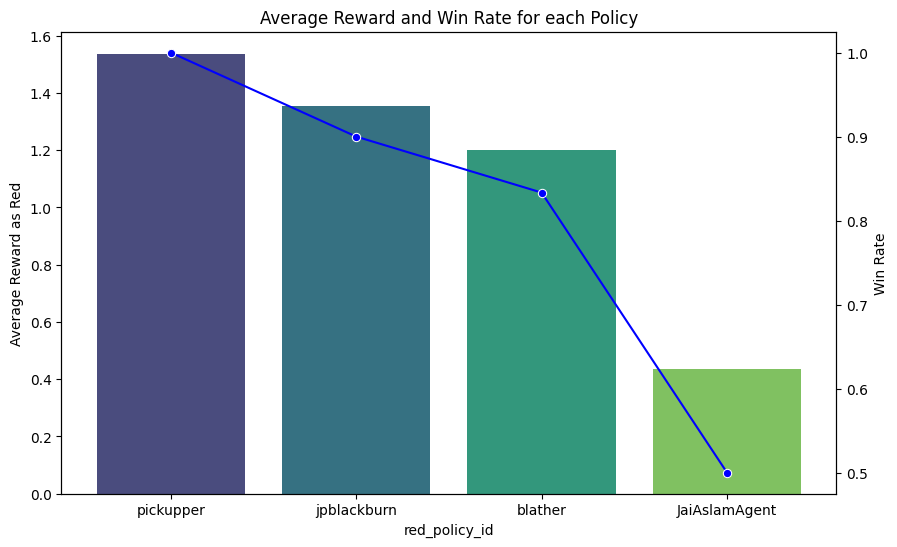

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Average Reward
sns.barplot(data=red_ranked, x='red_policy_id', y='Average Reward as Red', palette='viridis', ax=ax1)
ax1.set_title('Average Reward and Win Rate for each Policy')

# Line plot for Win Rate
ax2 = ax1.twinx()
sns.lineplot(data=red_ranked, x='red_policy_id', y='Win Rate', color='b', marker="o", ax=ax2)
ax2.set_ylabel('Win Rate')

plt.show()

In [42]:
import pandas as pd

# Your DataFrame is stored in df

# Group by 'red_policy_id' and compute the mean for 'red_0' and 'Solved Ratio'
# Group by 'red_policy_id' and compute the mean for 'red_0' and 'Solved Ratio'
grouped = Door_Key_Match_df.groupby('blue_policy_id')[['blue_0', 'Solved Ratio']].mean()


# Now sort the grouped DataFrame based on 'red_0' and 'Solved Ratio'
# Sort by multiple columns by passing a list of column names
blue_ranked = grouped.sort_values(by=['blue_0', 'Solved Ratio'], ascending=[False, False]).reset_index()

# The 'ranked' DataFrame now contains the ranking of red policies
# based on the average 'red_0' and 'Solved Ratio'
print(blue_ranked)


  blue_policy_id    blue_0  Solved Ratio
0  JaiAslamAgent -0.184100          0.75
1        blather -0.510100          0.80
2      pickupper -0.795733          0.80
3    jpblackburn -0.953550          1.00


In [43]:
blue_ranked = blue_ranked.rename(columns={'blue_0' : "Average Reward as Blue", 'Solved Ratio': "Win Rate"})

In [44]:
# Assuming your DataFrame is stored in a variable called 'df'
styled_df = blue_ranked.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background', '#606060'), 
                  ('color', 'white'),
                  ('font-family', 'verdana')]
    }]
)

# To display in Jupyter Notebook, just put this in a cell:
styled_df


,blue_policy_id,Average Reward as Blue,Win Rate
0,JaiAslamAgent,-0.184100,0.750000
1,blather,-0.510100,0.800000
2,pickupper,-0.795733,0.800000
3,jpblackburn,-0.953550,1.000000


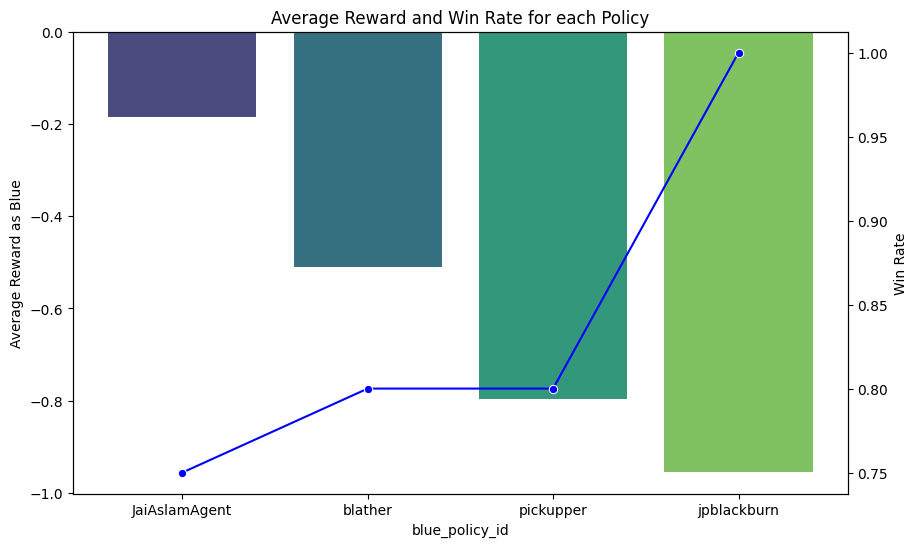

In [45]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Average Reward
sns.barplot(data=blue_ranked, x='blue_policy_id', y='Average Reward as Blue', palette='viridis', ax=ax1)
ax1.set_title('Average Reward and Win Rate for each Policy')

# Line plot for Win Rate
ax2 = ax1.twinx()
sns.lineplot(data=blue_ranked, x='blue_policy_id', y='Win Rate', color='b', marker="o", ax=ax2)
ax2.set_ylabel('Win Rate')

plt.show()

In [15]:
# Group by 'red_policy_id' and calculate the mean of 'red_0' for each group
red_policy_rewards = Door_Key_Match_df.groupby('red_policy_id')['red_0'].mean()

# Sort the policies by their mean rewards in descending order
red_policy_ranking = red_policy_rewards.sort_values(ascending=False)

# Reset index to make it look more like a DataFrame
red_policy_ranking = red_policy_ranking.reset_index()

# Rename columns for clarity
red_policy_ranking.columns = ['Red Policy ID', 'Average Reward']

# Display the ranking
print(red_policy_ranking)

   Red Policy ID  Average Reward
0      pickupper        1.537172
1    jpblackburn        1.352400
2        blather        1.200667
3  JaiAslamAgent        0.435800


In [16]:
# Group by 'red_policy_id' and calculate the mean of 'red_0' for each group
blue_policy_rewards = Door_Key_Match_df.groupby('blue_policy_id')['blue_0'].mean()

# Sort the policies by their mean rewards in descending order
blue_policy_ranking = blue_policy_rewards.sort_values(ascending=False)

# Reset index to make it look more like a DataFrame
blue_policy_ranking = blue_policy_ranking.reset_index()

# Rename columns for clarity
blue_policy_ranking.columns = ['Blue Policy ID', 'Average Reward']

# Display the ranking
print(blue_policy_ranking)

  Blue Policy ID  Average Reward
0  JaiAslamAgent       -0.184100
1        blather       -0.510100
2      pickupper       -0.795733
3    jpblackburn       -0.953550


In [17]:
Door_Key_Match_df['Rank'] = Door_Key_Match_df.groupby('red_policy_id')['Solved Ratio'].rank(ascending=False, method='min')

# to sort the DataFrame by the ranks
Door_Key_Match_df.sort_values(by=['red_policy_id', 'Rank'], inplace=True)

# to reset the index
Door_Key_Match_df.reset_index(drop=True, inplace=True)

In [18]:
Door_Key_Match_df

,red_0,blue_0,door_open_done,eliminated_opponents_done,got_eliminated_done,eliminated_opponent_num,Episode Length,Solved Ratio,red_policy_id,blue_policy_id,Solved,Rank
0,0.487900,-0.7483,0.000000,0.600000,0.0,0.600000,157.3,0.6,JaiAslamAgent,blather,NaN,1.0
1,0.383700,-0.5825,0.000000,0.400000,0.0,0.400000,188.2,0.4,JaiAslamAgent,pickupper,NaN,2.0
2,1.414400,-1.0018,0.000000,1.000000,0.0,1.000000,11.8,1.0,blather,pickupper,NaN,1.0
3,1.368200,-1.0029,0.000000,1.000000,0.0,1.000000,27.2,1.0,blather,jpblackburn,NaN,1.0
4,0.819400,-0.4504,0.000000,0.500000,0.0,0.500000,159.9,0.5,blather,JaiAslamAgent,NaN,3.0
5,1.451200,-0.8029,0.200000,0.800000,0.0,0.800000,16.1,1.0,jpblackburn,pickupper,NaN,1.0
6,1.253600,-0.4661,0.400000,0.400000,0.0,0.400000,75.2,0.8,jpblackburn,blather,NaN,2.0
7,1.530495,-0.3159,0.500000,0.400000,0.1,0.400000,26.1,1.0,pickupper,blather,NaN,1.0
8,1.831685,-0.9042,0.000000,1.000000,0.0,1.000000,22.4,1.0,pickupper,jpblackburn,NaN,1.0
9,1.249335,0.0822,0.555556,0.222222,0.3,0.222222,21.9,1.0,pickupper,JaiAslamAgent,1.0,1.0


In [19]:
len(Death_Match_dfs)


Death_Match_dfs_df = pd.concat(Death_Match_dfs, ignore_index=True)

In [20]:
Death_Match_dfs_df

,red_0,blue_0,door_open_done,eliminated_opponents_done,got_eliminated_done,eliminated_opponent_num,Episode Length,Solved Ratio,red_policy_id,blue_policy_id
0,-0.807811,0.6687,0.0,0.1,0.9,0.1,45.2,1.0,pickupper,JaiAslamAgent
1,0.298900,-0.5592,0.0,0.6,0.2,0.6,123.6,0.8,jpblackburn,blather
2,0.973000,-1.0015,0.0,1.0,0.0,1.0,9.0,1.0,JaiAslamAgent,pickupper
3,0.142456,-0.3018,0.0,0.6,0.4,0.6,45.3,1.0,pickupper,blather
4,0.715100,-0.8182,0.0,0.9,0.1,0.9,32.8,1.0,jpblackburn,pickupper
5,0.960600,-1.0012,0.0,1.0,0.0,1.0,13.1,1.0,blather,pickupper
6,-0.308500,0.2568,0.0,0.0,0.3,0.0,224.4,0.3,blather,JaiAslamAgent
7,0.314600,-0.7054,0.0,0.5,0.0,0.5,211.8,0.5,JaiAslamAgent,blather
8,0.940800,-1.0012,0.0,1.0,0.0,1.0,19.2,1.0,blather,jpblackburn
9,-0.513919,0.2519,0.0,0.3,0.7,0.3,82.6,1.0,pickupper,jpblackburn


In [21]:
import pandas as pd

# Your DataFrame is stored in df

# Group by 'red_policy_id' and compute the mean for 'red_0' and 'Solved Ratio'
# Group by 'red_policy_id' and compute the mean for 'red_0' and 'Solved Ratio'
grouped = Death_Match_dfs_df.groupby('red_policy_id')[['red_0', 'Solved Ratio']].mean()


# Now sort the grouped DataFrame based on 'red_0' and 'Solved Ratio'
# Sort by multiple columns by passing a list of column names
red_ranked = grouped.sort_values(by=['red_0', 'Solved Ratio'], ascending=[False, False]).reset_index()

# The 'ranked' DataFrame now contains the ranking of red policies
# based on the average 'red_0' and 'Solved Ratio'
print(red_ranked)


   red_policy_id     red_0  Solved Ratio
0  JaiAslamAgent  0.643800      0.750000
1        blather  0.530967      0.766667
2    jpblackburn  0.507000      0.900000
3      pickupper -0.393091      1.000000


In [24]:
# Assuming your DataFrame is stored in a variable called 'df'
styled_df = red_ranked.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background', '#606060'), 
                  ('color', 'white'),
                  ('font-family', 'verdana')]
    }]
)

# To display in Jupyter Notebook, just put this in a cell:
styled_df


,red_policy_id,red_0,Solved Ratio
0,JaiAslamAgent,0.643800,0.750000
1,blather,0.530967,0.766667
2,jpblackburn,0.507000,0.900000
3,pickupper,-0.393091,1.000000


In [23]:
import plotly.figure_factory as ff

# Assuming your DataFrame is stored in a variable called 'df'
fig = ff.create_table(red_ranked)
fig.show()


In [32]:
red_ranked = red_ranked.rename(columns={'red_0' : "Average Reward as Red", 'Solved Ratio': "Win Rate"})

In [33]:
# Assuming your DataFrame is stored in a variable called 'df'
styled_df = red_ranked.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background', '#606060'), 
                  ('color', 'white'),
                  ('font-family', 'verdana')]
    }]
)

# To display in Jupyter Notebook, just put this in a cell:
styled_df


,red_policy_id,Average Reward as Red,Win Rate
0,JaiAslamAgent,0.643800,0.750000
1,blather,0.530967,0.766667
2,jpblackburn,0.507000,0.900000
3,pickupper,-0.393091,1.000000


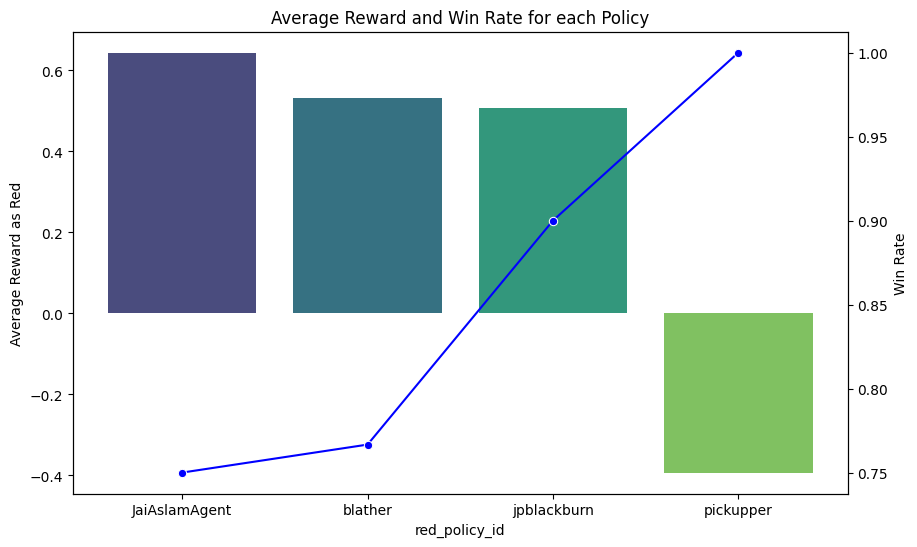

In [34]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Average Reward
sns.barplot(data=red_ranked, x='red_policy_id', y='Average Reward as Red', palette='viridis', ax=ax1)
ax1.set_title('Average Reward and Win Rate for each Policy')

# Line plot for Win Rate
ax2 = ax1.twinx()
sns.lineplot(data=red_ranked, x='red_policy_id', y='Win Rate', color='b', marker="o", ax=ax2)
ax2.set_ylabel('Win Rate')

plt.show()

In [28]:
import pandas as pd

# Your DataFrame is stored in df

# Group by 'red_policy_id' and compute the mean for 'red_0' and 'Solved Ratio'
# Group by 'red_policy_id' and compute the mean for 'red_0' and 'Solved Ratio'
grouped = Death_Match_dfs_df.groupby('blue_policy_id')[['blue_0', 'Solved Ratio']].mean()


# Now sort the grouped DataFrame based on 'red_0' and 'Solved Ratio'
# Sort by multiple columns by passing a list of column names
blue_ranked = grouped.sort_values(by=['blue_0', 'Solved Ratio'], ascending=[False, False]).reset_index()

# The 'ranked' DataFrame now contains the ranking of red policies
# based on the average 'red_0' and 'Solved Ratio'
print(blue_ranked)


  blue_policy_id    blue_0  Solved Ratio
0  JaiAslamAgent  0.462750      0.650000
1    jpblackburn -0.374650      1.000000
2        blather -0.522133      0.766667
3      pickupper -0.940300      1.000000


In [29]:
# # Assuming your DataFrame is stored in a variable called 'df'
# styled_df = red_ranked.style.set_table_styles(
#     [{
#         'selector': 'th',
#         'props': [('background', '#606060'), 
#                   ('color', 'white'),
#                   ('font-family', 'verdana')]
#     }]
# )

# # To display in Jupyter Notebook, just put this in a cell:
# styled_df


In [30]:
blue_ranked = blue_ranked.rename(columns={'blue_0' : "Average Reward as Blue", 'Solved Ratio': "Win Rate"})

In [31]:
# Assuming your DataFrame is stored in a variable called 'df'
styled_df = blue_ranked.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background', '#606060'), 
                  ('color', 'white'),
                  ('font-family', 'verdana')]
    }]
)

# To display in Jupyter Notebook, just put this in a cell:
styled_df


,blue_policy_id,Average Reward as Blue,Win Rate
0,JaiAslamAgent,0.462750,0.650000
1,jpblackburn,-0.374650,1.000000
2,blather,-0.522133,0.766667
3,pickupper,-0.940300,1.000000


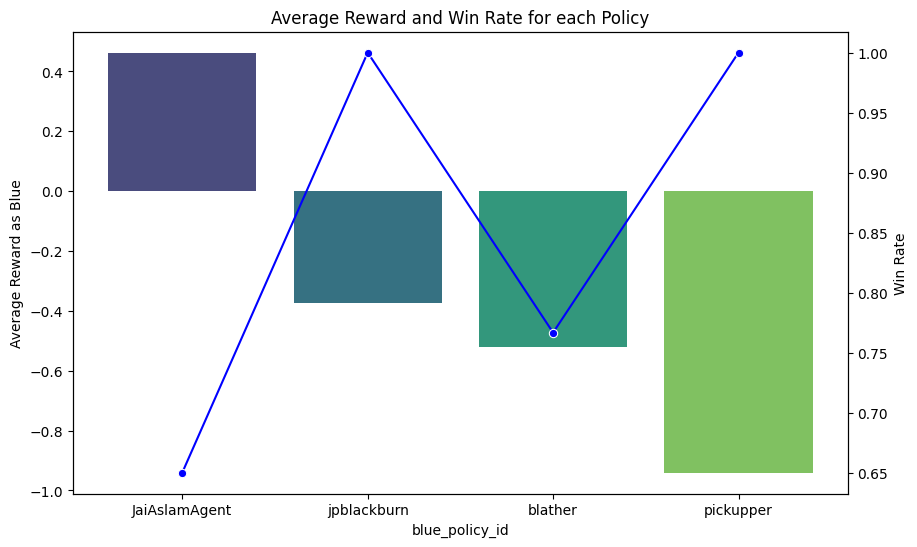

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Average Reward
sns.barplot(data=blue_ranked, x='blue_policy_id', y='Average Reward as Blue', palette='viridis', ax=ax1)
ax1.set_title('Average Reward and Win Rate for each Policy')

# Line plot for Win Rate
ax2 = ax1.twinx()
sns.lineplot(data=blue_ranked, x='blue_policy_id', y='Win Rate', color='b', marker="o", ax=ax2)
ax2.set_ylabel('Win Rate')

plt.show()